In [232]:
import pandas as pd
import numpy as np
from multiprocessing import Pool
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler

In [233]:
FILE_NAMES = ['.\\Data\\\ML\\ml1_games.parquet','.\\Data\\\ML\\ml2_users_items.parquet']

In [234]:
ml1_games = pd.read_parquet(FILE_NAMES[0])

In [235]:
ml1_games.head()

,publisher,specs,price,genres,year_of_release,developer,early_access,user_count,user_sentiment
id,,,,,,,,,
761140.0,Kotoshiro,[Single-player],4.99,"[Action, Casual, Indie, Simulation, Strategy]",2018.0,Kotoshiro,0.0,0,0.0
643980.0,"Making Fun, Inc.","[Single-player, Multi-player, Online Multi-Pla...",0.00,"[Free to Play, Indie, RPG, Strategy]",2018.0,Secret Level SRL,0.0,0,0.0
670290.0,Poolians.com,"[Single-player, Multi-player, Online Multi-Pla...",0.00,"[Casual, Free to Play, Indie, Simulation, Sports]",2017.0,Poolians.com,0.0,0,0.0
767400.0,彼岸领域,[Single-player],0.99,"[Action, Adventure, Casual]",2017.0,彼岸领域,0.0,0,0.0
773570.0,None,"[Single-player, Full controller support, HTC V...",2.99,None,NaN,None,0.0,0,0.0


In [236]:
ml1_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 761140.0 to 681550.0
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   publisher        24083 non-null  object 
 1   specs            31464 non-null  object 
 2   price            32133 non-null  float64
 3   genres           28851 non-null  object 
 4   year_of_release  29782 non-null  float64
 5   developer        28836 non-null  object 
 6   early_access     32133 non-null  float64
 7   user_count       32133 non-null  int64  
 8   user_sentiment   32133 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.5+ MB


### Games Price

c:\Users\chiri\Desktop\Proyecto Individual 01\.venv\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


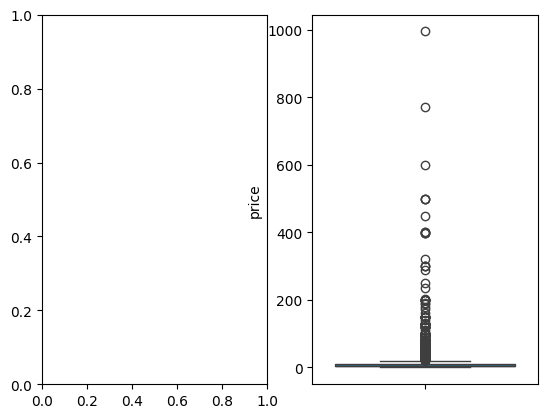

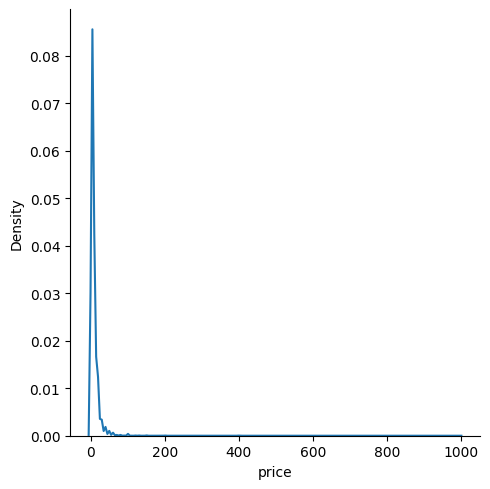

In [237]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.displot(ml1_games['price'], kind='kde', ax=ax1)
sns.boxplot(ml1_games['price'], ax=ax2)
plt.show()


# # sns.countplot(x=‘variable1’, data=df, ax=ax1)

# Plot the second countplot on the second axis
# sns.countplot(x=‘variable2’, data=df, ax=ax2)

c:\Users\chiri\Desktop\Proyecto Individual 01\.venv\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


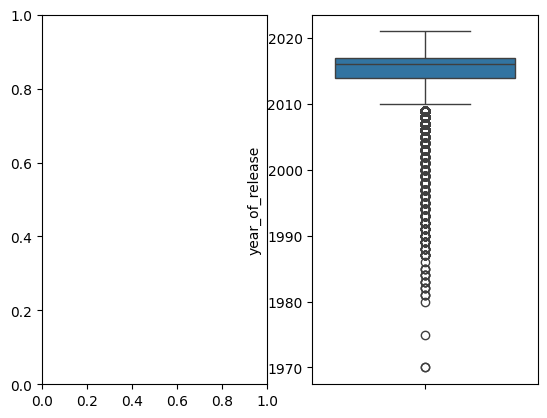

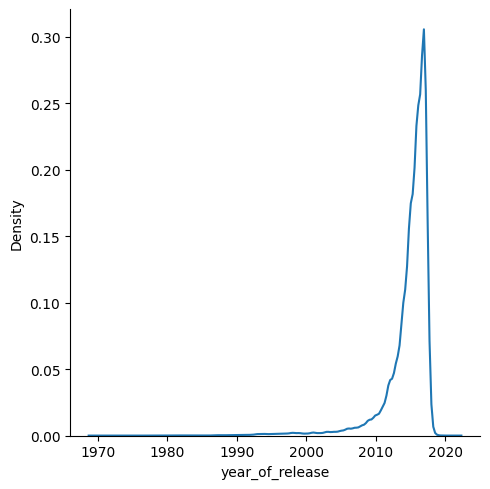

In [238]:
fig2, (ax1, ax2) = plt.subplots(1, 2)

sns.displot(ml1_games['year_of_release'], kind='kde', ax=ax1)
sns.boxplot(ml1_games['year_of_release'], ax=ax2)
plt.show()


c:\Users\chiri\Desktop\Proyecto Individual 01\.venv\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


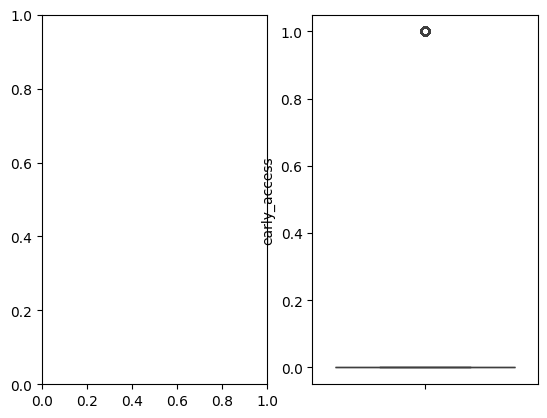

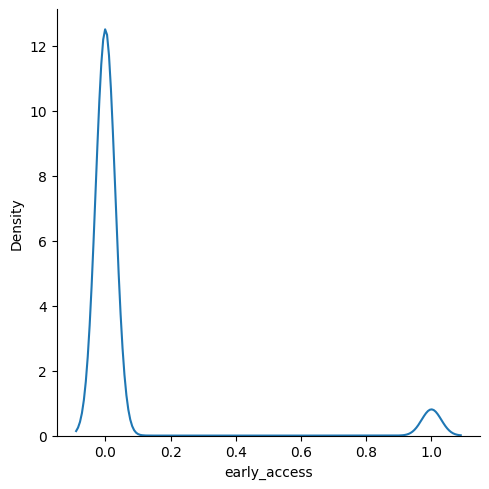

In [239]:
fig3, (ax1, ax2) = plt.subplots(1, 2)

sns.displot(ml1_games['early_access'], kind='kde', ax=ax1)
sns.boxplot(ml1_games['early_access'], ax=ax2)
plt.show()

c:\Users\chiri\Desktop\Proyecto Individual 01\.venv\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


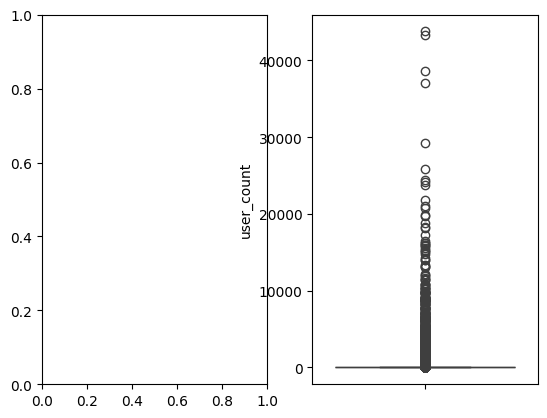

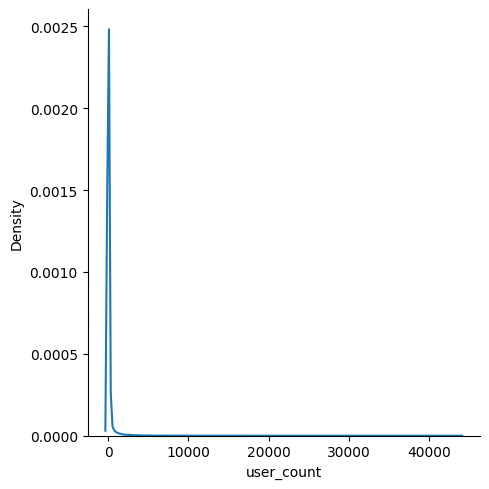

In [240]:
fig4, (ax1, ax2) = plt.subplots(1, 2)

sns.displot(ml1_games['user_count'], kind='kde', ax=ax1)
sns.boxplot(ml1_games['user_count'], ax=ax2)
plt.show()

c:\Users\chiri\Desktop\Proyecto Individual 01\.venv\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


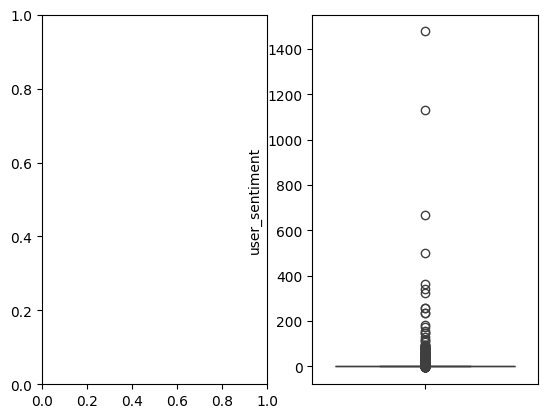

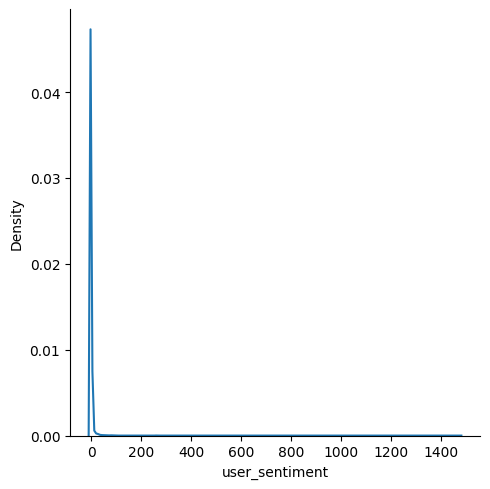

In [241]:
fig5, (ax1, ax2) = plt.subplots(1, 2)

sns.displot(ml1_games['user_sentiment'], kind='kde', ax=ax1)
sns.boxplot(ml1_games['user_sentiment'], ax=ax2)
plt.show()

In [242]:
games_id_specs = ml1_games[['specs']]
games_id_specs = games_id_specs.explode('specs')
games_id_specs.reset_index(drop=True,inplace=True)
games_id_specs

,specs
0,Single-player
1,Single-player
2,Multi-player
3,Online Multi-Player
4,Cross-Platform Multiplayer
...,...
144085,HTC Vive
144086,Oculus Rift
144087,Tracked Motion Controllers
144088,Standing


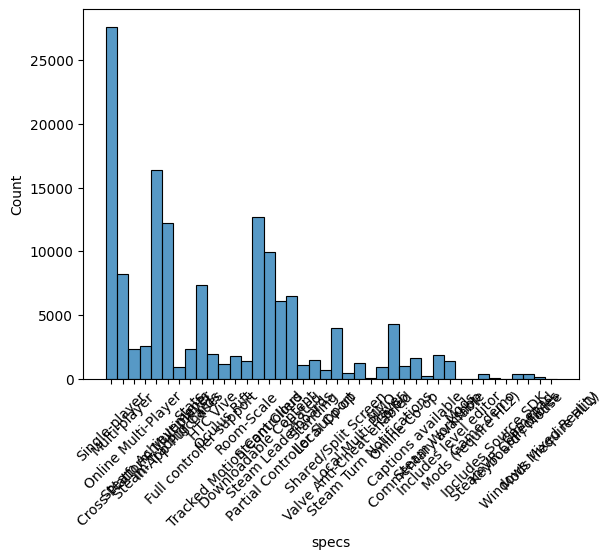

In [243]:
sns.histplot(data=games_id_specs, x='specs') 
plt.xticks(rotation=45)
plt.xticks(fontsize=10) 
plt.show()

In [244]:
ml1_games_final = ml1_games[['specs','price','genres','user_count','user_sentiment']]
ml1_games_final.dropna(inplace=True)
ml1_games_final_exploded = ml1_games_final.explode('specs')
# ml1_games_final['specs'] = ml1_games_final['specs'].apply(lambda x: ', '.join(x))
# # ml1_games_final['specs'].dropna(axis=1,inplace=True)
ml1_games_dummies = pd.get_dummies(ml1_games_final_exploded['specs'])
ml1_games_dummies = ml1_games_dummies.groupby(level=0).sum()
# ml1_games_dummies
ml1_games_final.head()

C:\Users\chiri\AppData\Local\Temp\ipykernel_14836\1874677605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml1_games_final.dropna(inplace=True)


,specs,price,genres,user_count,user_sentiment
id,,,,,
761140.0,[Single-player],4.99,"[Action, Casual, Indie, Simulation, Strategy]",0,0.0
643980.0,"[Single-player, Multi-player, Online Multi-Pla...",0.00,"[Free to Play, Indie, RPG, Strategy]",0,0.0
670290.0,"[Single-player, Multi-player, Online Multi-Pla...",0.00,"[Casual, Free to Play, Indie, Simulation, Sports]",0,0.0
767400.0,[Single-player],0.99,"[Action, Adventure, Casual]",0,0.0
772540.0,"[Single-player, Steam Achievements]",3.99,"[Action, Adventure, Simulation]",0,0.0


In [245]:
ml1_games_final.head()

,specs,price,genres,user_count,user_sentiment
id,,,,,
761140.0,[Single-player],4.99,"[Action, Casual, Indie, Simulation, Strategy]",0,0.0
643980.0,"[Single-player, Multi-player, Online Multi-Pla...",0.00,"[Free to Play, Indie, RPG, Strategy]",0,0.0
670290.0,"[Single-player, Multi-player, Online Multi-Pla...",0.00,"[Casual, Free to Play, Indie, Simulation, Sports]",0,0.0
767400.0,[Single-player],0.99,"[Action, Adventure, Casual]",0,0.0
772540.0,"[Single-player, Steam Achievements]",3.99,"[Action, Adventure, Simulation]",0,0.0


In [246]:
ml1_games_final_exploded_genres = ml1_games_final.explode('genres')

ml1_games_final_exploded_genres['genres'].dropna(inplace=True)
# print(ml1_games_final_exploded_genres['genres'].unique())
ml1_games_dummies_genres = pd.get_dummies(ml1_games_final_exploded_genres['genres'])
ml1_games_dummies_genres = ml1_games_dummies_genres.groupby(level=0).sum()
ml1_games_dummies_genres.head()

,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,Free to Play,Indie,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
id,,,,,,,,,,,,,,,,,,,,,
10.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
ml1_games_final_exploded_sepcs = ml1_games_final.explode('specs')
ml1_games_final_exploded_sepcs['specs'].dropna(inplace=True)
# print(ml1_games_final_exploded_sepcs['specs'].unique())
ml1_games_dummies_specs = pd.get_dummies(ml1_games_final_exploded_sepcs['specs'])
ml1_games_dummies_specs = ml1_games_dummies_specs.groupby(level=0).sum()
# ml1_games_dummies_genres

# ml1_games_final_exploded_sepcs
ml1_games_dummies_specs.head()

,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Downloadable Content,Full controller support,Game demo,In-App Purchases,Includes Source SDK,Includes level editor,...,Single-player,Stats,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Valve Anti-Cheat enabled
id,,,,,,,,,,,,,,,,,,,,,
10.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [248]:
ml1_games_final
scaler = StandardScaler()
scaler.fit(ml1_games_final[['price', 'user_count', 'user_sentiment']])
scaled_columns = scaler.transform(ml1_games_final[['price', 'user_count', 'user_sentiment']])

ml1_games_final[['price', 'user_count', 'user_sentiment']] = scaled_columns
ml1_games_final.head()

C:\Users\chiri\AppData\Local\Temp\ipykernel_14836\3959032106.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml1_games_final[['price', 'user_count', 'user_sentiment']] = scaled_columns


,specs,price,genres,user_count,user_sentiment
id,,,,,
761140.0,[Single-player],-0.246621,"[Action, Casual, Indie, Simulation, Strategy]",-0.146035,-0.047353
643980.0,"[Single-player, Multi-player, Online Multi-Pla...",-0.594428,"[Free to Play, Indie, RPG, Strategy]",-0.146035,-0.047353
670290.0,"[Single-player, Multi-player, Online Multi-Pla...",-0.594428,"[Casual, Free to Play, Indie, Simulation, Sports]",-0.146035,-0.047353
767400.0,[Single-player],-0.525424,"[Action, Adventure, Casual]",-0.146035,-0.047353
772540.0,"[Single-player, Steam Achievements]",-0.316322,"[Action, Adventure, Simulation]",-0.146035,-0.047353


In [249]:
ml1_games_v1 = ml1_games_final[['price','user_count','user_sentiment']]
ml1_games_v1.head()

,price,user_count,user_sentiment
id,,,
761140.0,-0.246621,-0.146035,-0.047353
643980.0,-0.594428,-0.146035,-0.047353
670290.0,-0.594428,-0.146035,-0.047353
767400.0,-0.525424,-0.146035,-0.047353
772540.0,-0.316322,-0.146035,-0.047353


In [250]:
ml1_games_v2= ml1_games_v1.merge(ml1_games_dummies_genres, left_index=True, right_index=True) 
ml1_games_v2 .head()

,price,user_count,user_sentiment,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
id,,,,,,,,,,,,,,,,,,,,,
10.0,0.101883,9.531495,1.534509,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20.0,-0.246621,6.150573,0.374100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30.0,-0.246621,3.298510,0.081707,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40.0,-0.246621,3.108637,0.018095,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50.0,-0.246621,6.105838,0.062384,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
ml1_games_v3= ml1_games_v2.merge(ml1_games_dummies_specs, left_index=True, right_index=True) 
ml1_games_v3.head()

,price,user_count,user_sentiment,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,...,Single-player,Stats,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Valve Anti-Cheat enabled
id,,,,,,,,,,,,,,,,,,,,,
10.0,0.101883,9.531495,1.534509,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20.0,-0.246621,6.150573,0.374100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30.0,-0.246621,3.298510,0.081707,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40.0,-0.246621,3.108637,0.018095,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50.0,-0.246621,6.105838,0.062384,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [252]:
ml1_games_v3.head()

,price,user_count,user_sentiment,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,...,Single-player,Stats,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Valve Anti-Cheat enabled
id,,,,,,,,,,,,,,,,,,,,,
10.0,0.101883,9.531495,1.534509,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20.0,-0.246621,6.150573,0.374100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30.0,-0.246621,3.298510,0.081707,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40.0,-0.246621,3.108637,0.018095,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50.0,-0.246621,6.105838,0.062384,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [253]:
# ml1_games_v4 = ml1_games_v3.reset_index(drop=False)
# ml1_games_v4.rename(columns={'id':'game_id'},inplace=True)

ml1_games_v4 = ml1_games_v3

In [254]:
ml1_games_v4.head()

,price,user_count,user_sentiment,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,...,Single-player,Stats,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Valve Anti-Cheat enabled
id,,,,,,,,,,,,,,,,,,,,,
10.0,0.101883,9.531495,1.534509,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20.0,-0.246621,6.150573,0.374100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30.0,-0.246621,3.298510,0.081707,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40.0,-0.246621,3.108637,0.018095,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50.0,-0.246621,6.105838,0.062384,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


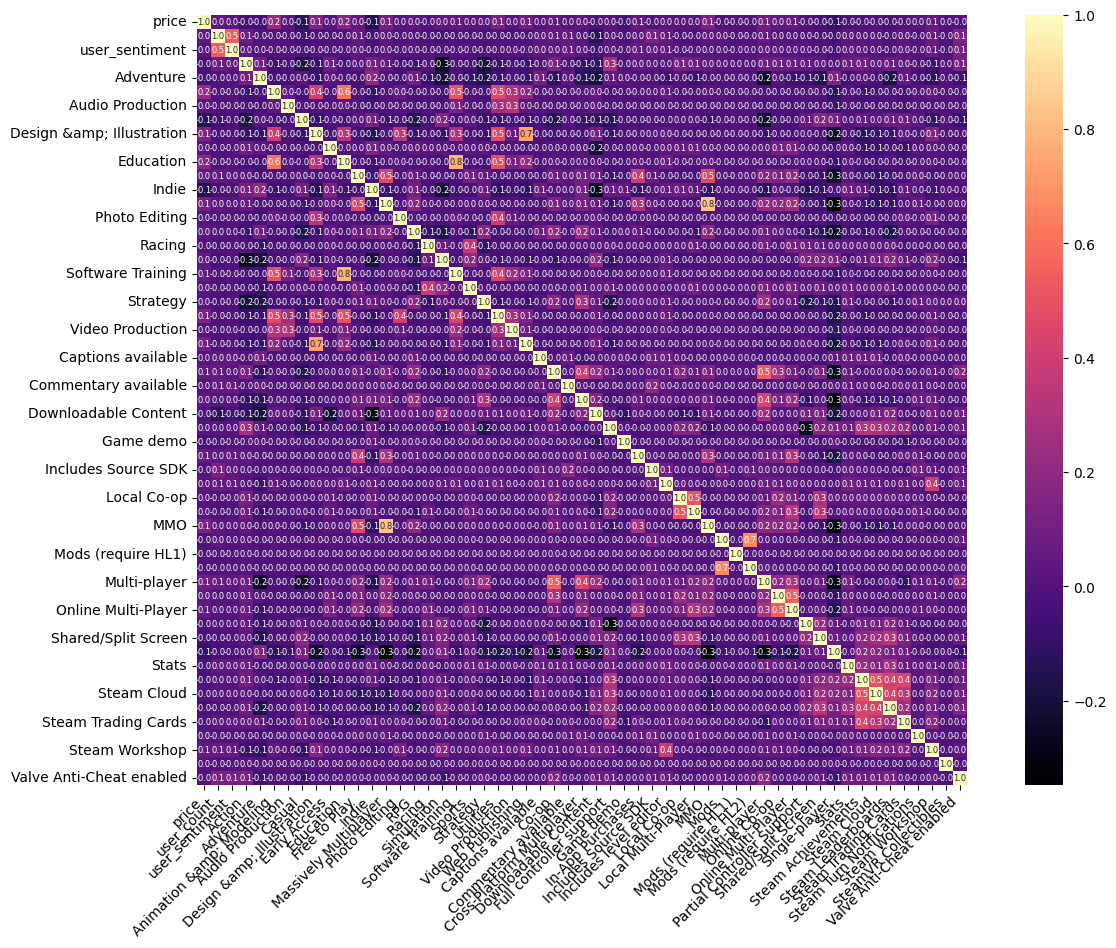

In [255]:
matriz = plt.figure(figsize= (15,10))
color = plt.get_cmap('magma')
color.set_bad('green')
sns.heatmap(ml1_games_v3.corr(), annot=True, cmap=color, annot_kws={"size": 6 }, cbar=True, square=True, fmt='.1f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

In [256]:
ml1_games_v4.to_parquet('.\\Data\\\ML\\ml1_games_for_model.parquet')

# ML 2 Recomendacion Usuario

In [257]:
ml2_user = pd.read_parquet(FILE_NAMES[1])

In [258]:
ml2_user.set_index('user_id',drop=True,inplace=True)
ml2_user.drop_duplicates()
ml2_user.head()

,genre_played,spec,price,genre_liked
user_id,,,,
76561197970982479,Action,Single-player,14.802974,Action
js41637,Action,Single-player,10.968072,Action
evcentric,Indie,Single-player,12.558110,Action
Riot-Punch,Action,Single-player,12.462255,None
doctr,Action,Single-player,14.750587,RPG


ValueError: cannot reindex on an axis with duplicate labels

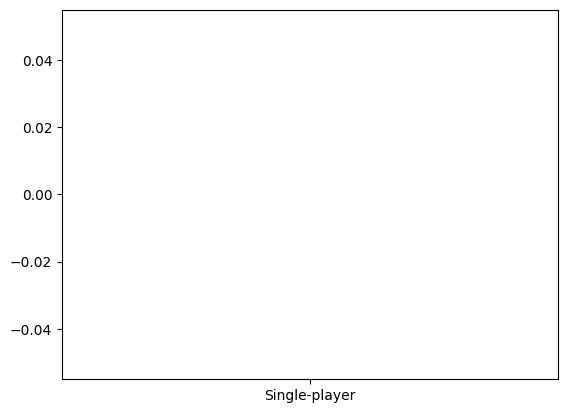

In [259]:
sns.histplot(data=ml2_user, x='spec') 
plt.xticks(rotation=45)
plt.xticks(fontsize=10) 
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

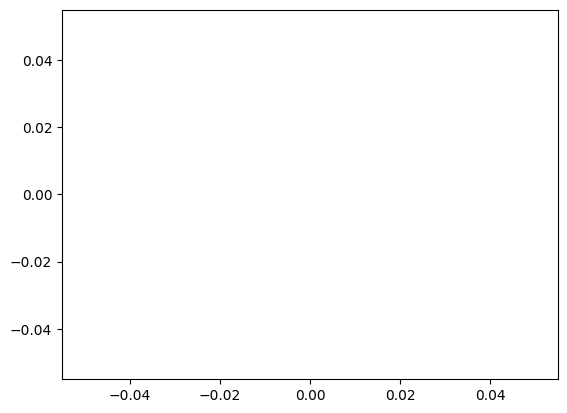

In [ ]:
sns.histplot(data=ml2_user, x='price') 
plt.xticks(rotation=45)
plt.xticks(fontsize=10) 
plt.show()

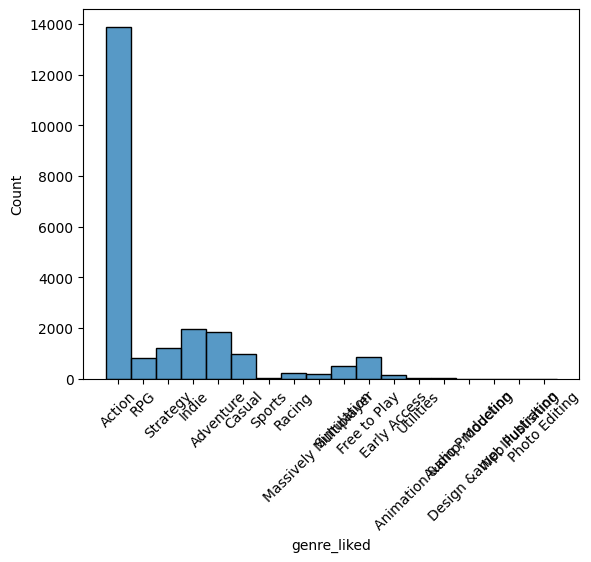

In [ ]:
sns.histplot(data=ml2_user, x='genre_liked') 
plt.xticks(rotation=45)
plt.xticks(fontsize=10) 
plt.show()

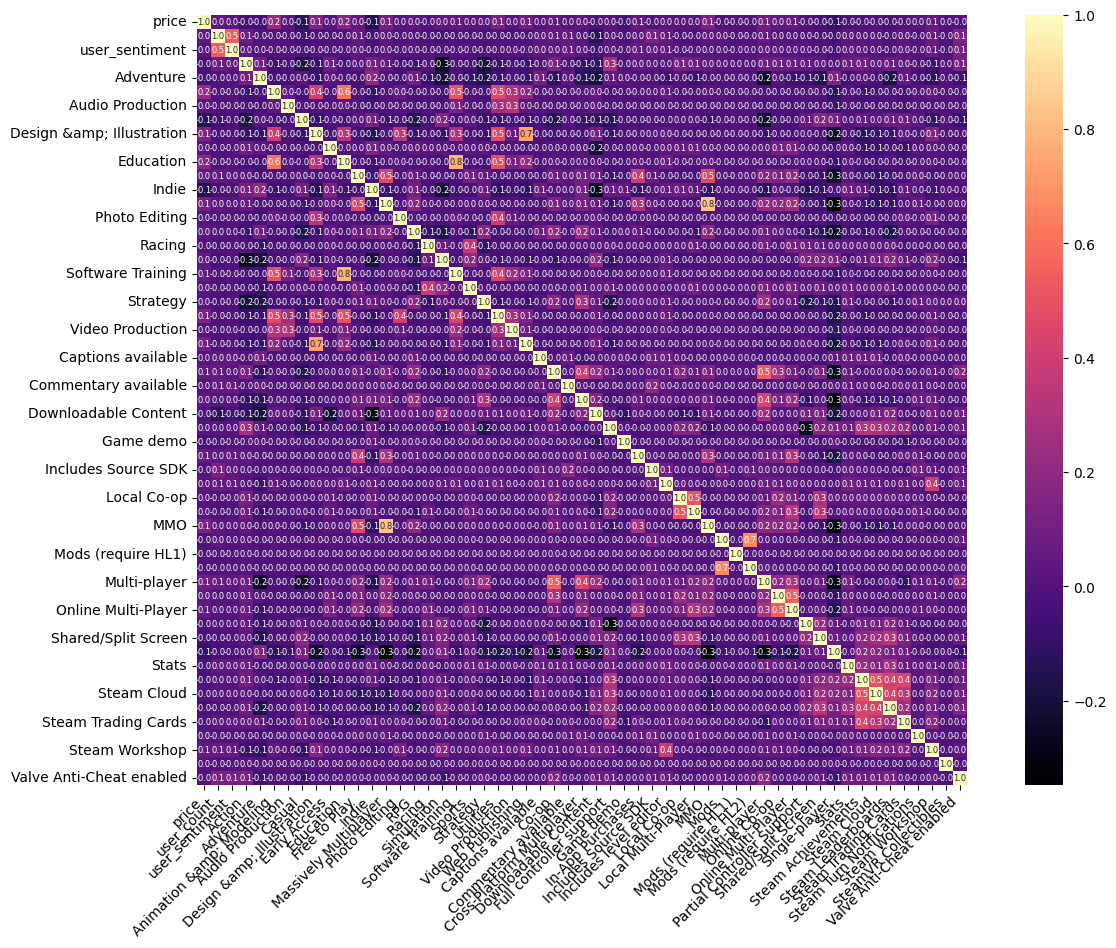

In [ ]:
matriz = plt.figure(figsize= (15,10))
color = plt.get_cmap('magma')
color.set_bad('green')
sns.heatmap(ml1_games_v3.corr(), annot=True, cmap=color, annot_kws={"size": 6 }, cbar=True, square=True, fmt='.1f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
# genre_played dummies

ml2_user_exploded_genre_played = ml2_user.explode('genre_played')
ml2_user_exploded_genre_played['genre_played'].dropna(inplace=True)

ml2_user_dummies_genre_played_ = pd.get_dummies(ml2_user_exploded_genre_played['genre_played'])
ml2_user_dummies_genre_played_ = ml2_user_dummies_genre_played_.groupby(level=0).sum()

ml2_user_dummies_genre_played_.head()

,Action,Adventure,Animation &amp; Modeling,Casual,Design &amp; Illustration,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,Utilities,Video Production,Web Publishing
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
	# spec  dummies

ml2_user_exploded_spec = ml2_user.explode('spec')
ml2_user_exploded_spec['spec'].dropna(inplace=True)

ml2_user_dummies__spec_ = pd.get_dummies(ml2_user_exploded_spec['spec'])
ml2_user_dummies__spec_ = ml2_user_dummies__spec_.groupby(level=0).sum()

ml2_user_dummies__spec_.head()

,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Downloadable Content,Full controller support,HTC Vive,In-App Purchases,Includes Source SDK,Includes level editor,...,Online Co-op,Online Multi-Player,Partial Controller Support,Single-player,Stats,Steam Achievements,Steam Cloud,Steam Trading Cards,Steam Workshop,Valve Anti-Cheat enabled
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# genre_liked dummies

ml2_user_exploded_liked = ml2_user.explode('genre_liked')
ml2_user_exploded_liked['genre_liked'].dropna(inplace=True)

ml2_user_dummies_liked_ = pd.get_dummies(ml2_user_exploded_liked['genre_liked'])
ml2_user_dummies_liked_ = ml2_user_dummies_liked_.groupby(level=0).sum()

ml2_user_dummies_liked_ = ml2_user_dummies_liked_.add_suffix('_like')
ml2_user_dummies_liked_.head()

,Action_like,Adventure_like,Animation &amp; Modeling_like,Audio Production_like,Casual_like,Design &amp; Illustration_like,Early Access_like,Free to Play_like,Indie_like,Massively Multiplayer_like,Photo Editing_like,RPG_like,Racing_like,Simulation_like,Sports_like,Strategy_like,Utilities_like,Web Publishing_like
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# price normalized

ml2_user_price_norm = ml2_user.copy()
ml2_user_price_norm = ml2_user_price_norm[['user_id','price']]
scaler = StandardScaler()
scaler.fit(ml2_user[['price']])
scaled_columns = scaler.transform(ml2_user[['price']])

ml2_user_price_norm[['price']] = scaled_columns
ml2_user_price_norm.head()

,user_id,price
0,76561197970982479,0.486542
1,js41637,-0.124877
2,evcentric,0.128632
3,Riot-Punch,0.113349
4,doctr,0.478190


In [ ]:
ml2_final_ = ml2_user_price_norm.copy()
ml2_final_.head()

,user_id,price
0,76561197970982479,0.486542
1,js41637,-0.124877
2,evcentric,0.128632
3,Riot-Punch,0.113349
4,doctr,0.478190


In [ ]:
ml2_final_v1= ml2_final_.merge(ml2_user_dummies_liked_, left_index=True, right_index=True) 
ml2_final_v1.head()


,user_id,price,Action_like,Adventure_like,Animation &amp; Modeling_like,Audio Production_like,Casual_like,Design &amp; Illustration_like,Early Access_like,Free to Play_like,Indie_like,Massively Multiplayer_like,Photo Editing_like,RPG_like,Racing_like,Simulation_like,Sports_like,Strategy_like,Utilities_like,Web Publishing_like
0,76561197970982479,0.486542,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,js41637,-0.124877,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,evcentric,0.128632,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Riot-Punch,0.113349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,doctr,0.478190,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
ml2_final_v2= ml2_final_v1.merge(ml2_user_dummies__spec_, left_index=True, right_index=True) 
ml2_final_v2.head()

,user_id,price,Action_like,Adventure_like,Animation &amp; Modeling_like,Audio Production_like,Casual_like,Design &amp; Illustration_like,Early Access_like,Free to Play_like,...,Online Co-op,Online Multi-Player,Partial Controller Support,Single-player,Stats,Steam Achievements,Steam Cloud,Steam Trading Cards,Steam Workshop,Valve Anti-Cheat enabled
0,76561197970982479,0.486542,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,js41637,-0.124877,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,evcentric,0.128632,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Riot-Punch,0.113349,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,doctr,0.478190,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
ml2_final_v3= ml2_final_v2.merge(ml2_user_dummies_genre_played_, left_index=True, right_index=True) 
# ml2_final_v3.dropna(inplace=True)
ml2_final_v3.fillna(0,inplace=True)
ml2_final_v3.head()

,user_id,price,Action_like,Adventure_like,Animation &amp; Modeling_like,Audio Production_like,Casual_like,Design &amp; Illustration_like,Early Access_like,Free to Play_like,...,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,Utilities,Video Production,Web Publishing
0,76561197970982479,0.486542,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,js41637,-0.124877,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,evcentric,0.128632,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Riot-Punch,0.113349,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,doctr,0.478190,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ml2_final_v3.rename(columns={'price':'avg_price'},inplace=True)

In [ ]:
ml2_final_v3['genres'] =  ml2_user['genre_played']

In [ ]:
ml2_final_v3.head()

,user_id,avg_price,Action_like,Adventure_like,Animation &amp; Modeling_like,Audio Production_like,Casual_like,Design &amp; Illustration_like,Early Access_like,Free to Play_like,...,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,Utilities,Video Production,Web Publishing,genres
0,76561197970982479,0.486542,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Action
1,js41637,-0.124877,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Action
2,evcentric,0.128632,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Indie
3,Riot-Punch,0.113349,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Action
4,doctr,0.478190,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Action


In [ ]:
ml2_final_v3.to_parquet('.\\Data\\\ML\\ml2_users_for_model.parquet')

In [ ]:
matriz = plt.figure(figsize= (15,10))
color = plt.get_cmap('magma')
color.set_bad('green')
sns.heatmap(ml2_final_v3.corr(), annot=True, cmap=color, annot_kws={"size": 6 }, cbar=True, square=True, fmt='.1f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

ValueError: could not convert string to float: 'js41637'

<Figure size 1500x1000 with 0 Axes>

In [ ]:
ml1_games_final.head()

In [ ]:
ml3_genre = ml1_games_final.explode('genres')
ml3_genre.head()

In [ ]:
ml3_genre_spect = ml3_genre.explode('specs')
ml3_genre_spect.head()